# Kelompok: The Insomniacs
# Kelas: Data Science Batch 19A
# Nama Anggota:
###    1. Vannessa Yoanita Oktorio Naibaho
###    2. Shindy Atila Putri
###    3. Rizki Amanda Putri
###    4. Ebit Nur Alam
###    5. Qonita Sungsang
###    6. Ulfathea Mulyadita
###    7. Muhammad Hafiz Abdul Aziz

In [1]:
# Pandas dan Numpy
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

#Statistic Library
import scipy.stats as st
from scipy.stats import chi2_contingency
import statsmodels.stats.proportion as sp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
sns.set_theme()
%config InlineBackend.figure_format = 'retina'

import scipy.stats as stats
import pylab
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,classification_report,precision_recall_curve,confusion_matrix,roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
from sklearn.neural_network import MLPClassifier
filterwarnings('ignore')

In [3]:
#from google.colab import files
#file = files.upload()

Saving train_hi.csv to train_hi.csv


In [ ]:
#import io
#df = pd.read_csv(io.StringIO(file['Insurance_dataset.csv'].decode('utf-8')))
#print(df)

In [ ]:
df = pd.read_csv('Insurance_dataset.csv')
df.head()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# **1. Data Cleansing**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
df.describe(include = [np.number])

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
df.describe(include = [object])

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


## A. Handle Missing Values

In [9]:
print("Kolom yang memiliki missing value adalah :")
df.columns[df.isnull().any()].tolist()

Kolom yang memiliki missing value adalah :


[]

## B. Handle Duplicated Data

In [10]:
df.duplicated().sum()

0

## C. Handle Outliers

In [11]:
num = ['Age', 'Annual_Premium', 'Vintage']
cat = ['Gender', 'Driving_License', 'Policy_Sales_Channel', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']

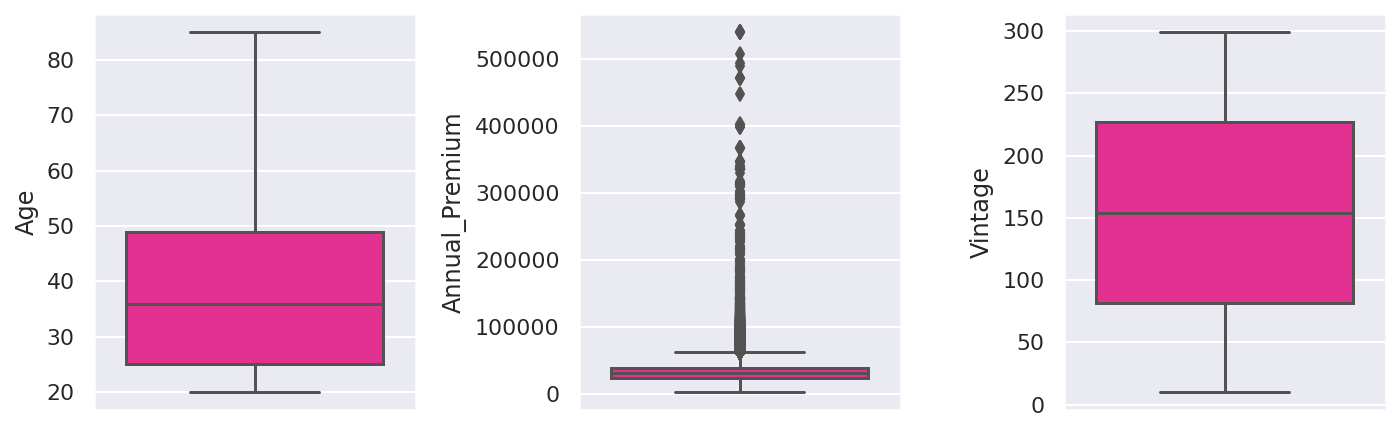

In [12]:
feature = num
plt.figure(figsize=(20, 15))
for i in range(0, len(feature)):
    plt.subplot(5, 6,  i+1)
    sns.boxplot(y=df[feature[i]], color='deeppink', orient='v')
    plt.tight_layout()

### Z-Score

In [13]:
from scipy import stats

In [14]:
z_scores = np.abs(stats.zscore(df['Annual_Premium']))
filtered_entriess = (z_scores < 3)
df = df[filtered_entriess]

In [15]:
df.describe(include = [np.number])

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,379026.000000,379026.000000,379026.000000,379026.000000,379026.000000,379026.000000,379026.000000,379026.000000,379026.000000
mean,190529.032642,38.798666,0.997879,26.397751,0.458293,30122.633666,112.118456,154.351290,0.122387
std,110023.715172,15.498744,0.046008,13.245187,0.498258,15695.692881,54.175411,83.669968,0.327733
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95248.250000,25.000000,1.000000,15.000000,0.000000,24346.000000,29.000000,82.000000,0.000000
50%,190515.500000,36.000000,1.000000,28.000000,0.000000,31594.000000,136.000000,154.000000,0.000000
75%,285804.750000,49.000000,1.000000,35.000000,1.000000,39230.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,82202.000000,163.000000,299.000000,1.000000


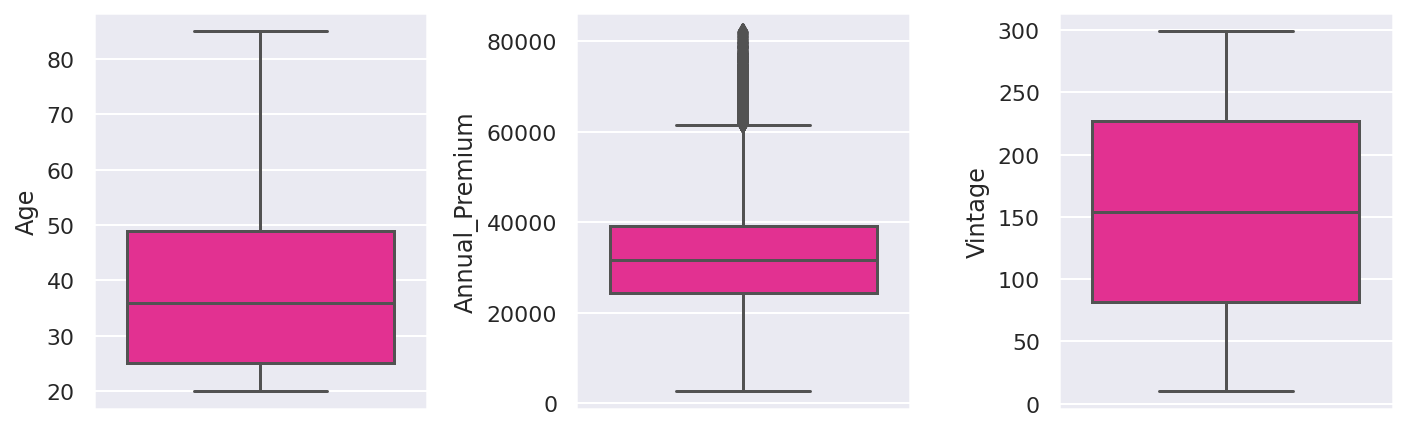

In [16]:
feature = num
plt.figure(figsize=(20, 15))
for i in range(0, len(feature)):
    plt.subplot(5, 6,  i+1)
    sns.boxplot(y=df[feature[i]], color='deeppink', orient='v')
    plt.tight_layout()

### IQR

In [17]:
Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
IQR

14884.0

In [18]:
low = Q1 - (1.5 * IQR)
high = Q3 + (1.5 * IQR)
filtered_entries = ((df['Annual_Premium'] >= low) & (df['Annual_Premium'] <= high))
df = df[filtered_entries]
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [19]:
df.describe(include = [np.number])

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,370466.000000,370466.000000,370466.000000,370466.000000,370466.000000,370466.000000,370466.000000,370466.000000,370466.000000
mean,190535.142323,38.665297,0.997943,26.438356,0.459710,29236.338970,112.557131,154.342110,0.121744
std,110033.513932,15.437350,0.045306,13.313633,0.498375,14718.271269,54.035058,83.670536,0.326990
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95217.250000,25.000000,1.000000,15.000000,0.000000,24094.000000,30.000000,82.000000,0.000000
50%,190532.500000,36.000000,1.000000,28.000000,0.000000,31309.000000,151.000000,154.000000,0.000000
75%,285818.750000,49.000000,1.000000,36.000000,1.000000,38571.750000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,61556.000000,163.000000,299.000000,1.000000


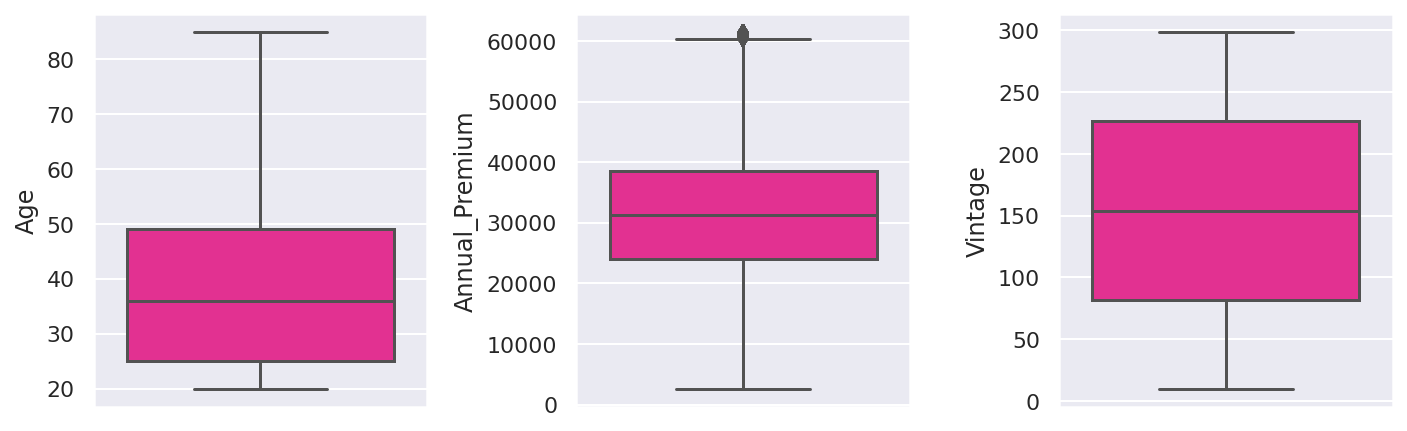

In [20]:
feature = num
plt.figure(figsize=(20, 15))
for i in range(0, len(feature)):
    plt.subplot(5, 6,  i+1)
    sns.boxplot(y=df[feature[i]], color='deeppink', orient='v')
    plt.tight_layout()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370466 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    370466 non-null  int64  
 1   Gender                370466 non-null  object 
 2   Age                   370466 non-null  int64  
 3   Driving_License       370466 non-null  int64  
 4   Region_Code           370466 non-null  float64
 5   Previously_Insured    370466 non-null  int64  
 6   Vehicle_Age           370466 non-null  object 
 7   Vehicle_Damage        370466 non-null  object 
 8   Annual_Premium        370466 non-null  float64
 9   Policy_Sales_Channel  370466 non-null  float64
 10  Vintage               370466 non-null  int64  
 11  Response              370466 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 36.7+ MB


In [22]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,370466.000000,370466.000000,370466.000000,370466.000000,370466.000000,370466.000000,370466.000000,370466.000000,370466.000000
mean,190535.142323,38.665297,0.997943,26.438356,0.459710,29236.338970,112.557131,154.342110,0.121744
std,110033.513932,15.437350,0.045306,13.313633,0.498375,14718.271269,54.035058,83.670536,0.326990
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95217.250000,25.000000,1.000000,15.000000,0.000000,24094.000000,30.000000,82.000000,0.000000
50%,190532.500000,36.000000,1.000000,28.000000,0.000000,31309.000000,151.000000,154.000000,0.000000
75%,285818.750000,49.000000,1.000000,36.000000,1.000000,38571.750000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,61556.000000,163.000000,299.000000,1.000000


## D. Feature Transformation

## Standarization, Normalization, Log Transformation


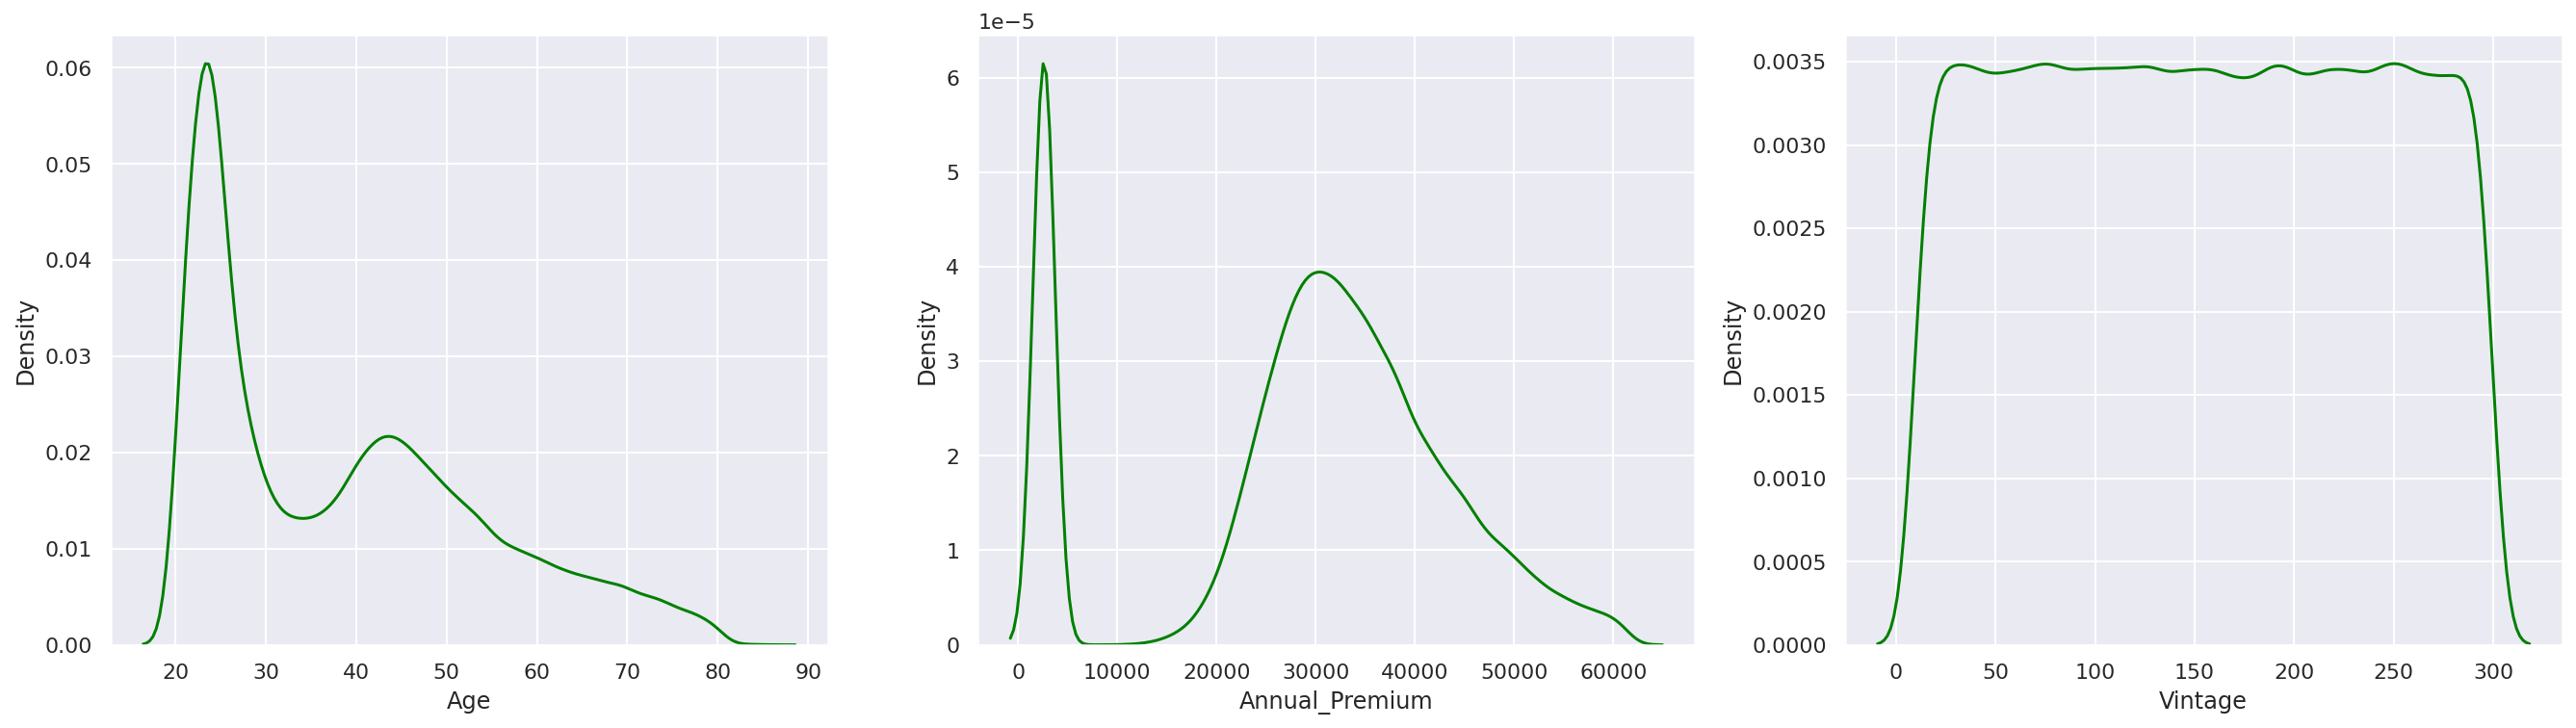

In [22]:
features = num
plt.figure(figsize=(25, 10))
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

In [23]:
features = ['Age', 'Annual_Premium']

for var in features:
  df[var]= (df[var]+1).apply(np.log)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
for var in features:
    df[var]= StandardScaler().fit_transform(df[var].values.reshape(len(df), 1))

In [24]:
featuresss = ['Vintage']
for var in featuresss:
    df[var]= StandardScaler().fit_transform(df[var].values.reshape(len(df), 1))

In [25]:
df[['Age', 'Annual_Premium', 'Vintage']].describe()

,Age,Annual_Premium,Vintage
count,3.704660e+05,3.704660e+05,3.704660e+05
mean,-2.524744e-15,1.038347e-15,-5.440922e-17
std,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.484766e+00,-2.110541e+00,-1.725127e+00
25%,-9.216125e-01,1.097151e-01,-8.646079e-01
50%,8.709291e-03,3.723124e-01,-4.088777e-03
75%,8.026653e-01,5.814499e-01,8.683820e-01
max,2.232670e+00,1.050053e+00,1.728901e+00


In [26]:
cek_after = ['Age', 'Annual_Premium', 'Vintage']

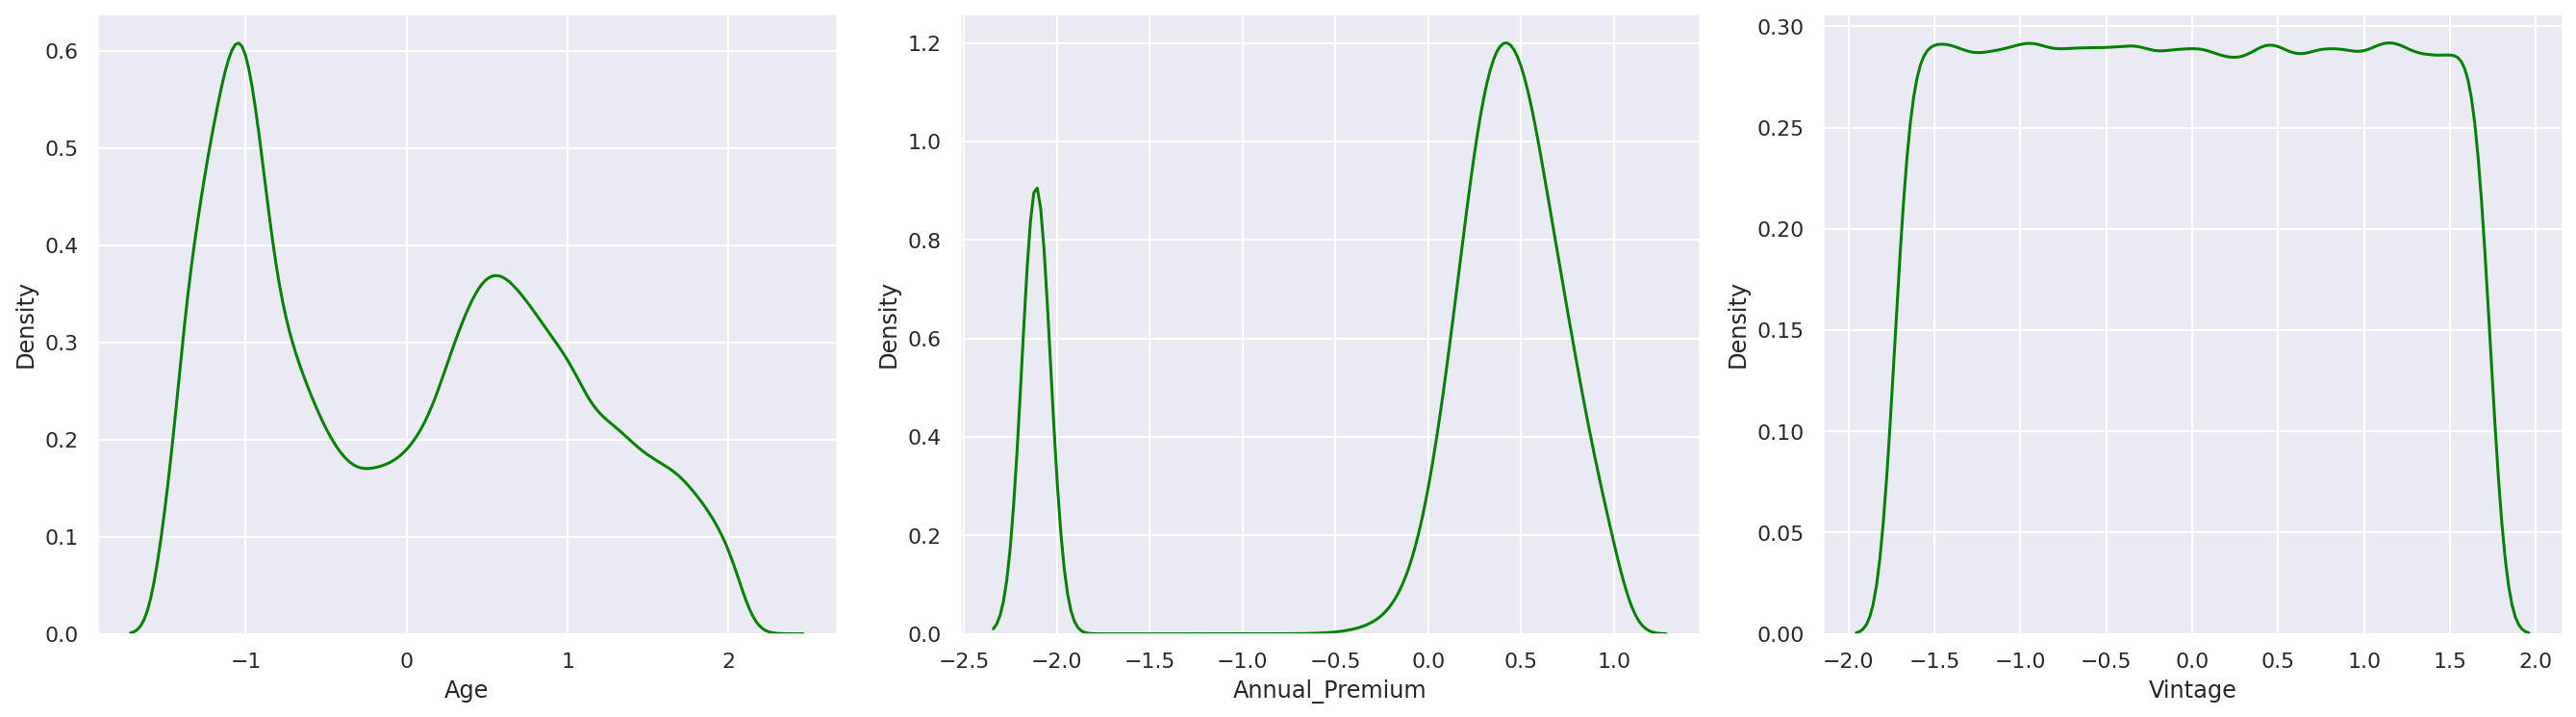

In [27]:
feat = cek_after
plt.figure(figsize=(25, 10))
for i in range(0, len(feat)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[feat[i]], color='green')
    plt.xlabel(feat[i])
    plt.tight_layout()

## E. Feature Encoding

In [28]:
cats_updated = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column Gender
Male      200140
Female    170326
Name: Gender, dtype: int64
------------------------------ 

value counts of column Vehicle_Age
1-2 Year     194018
< 1 Year     161445
> 2 Years     15003
Name: Vehicle_Age, dtype: int64
------------------------------ 

value counts of column Vehicle_Damage
Yes    186373
No     184093
Name: Vehicle_Damage, dtype: int64
------------------------------ 



### Gender & Vehicle_Damage



In [29]:
mapping_Gender = {
    'Male' : 0,
    'Female' : 1
}

mapping_vehicle_damage = {
    'No' : 0,
    'Yes' : 1
    
}

mapping_vehicle_Age = {
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years' : 2
    
}

df['Gender'] = df['Gender'] .map(mapping_Gender)
df['Vehicle_Damage'] = df['Vehicle_Damage'].map(mapping_vehicle_damage)
df['Vehicle_Age'] = df['Vehicle_Age'].map(mapping_vehicle_Age)

## F. Class Imbalance

In [30]:
cat_vc = ['Gender', 'Driving_License', 'Policy_Sales_Channel', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']

for col in cat_vc:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column Gender
0    200140
1    170326
Name: Gender, dtype: int64
------------------------------ 

value counts of column Driving_License
1    369704
0       762
Name: Driving_License, dtype: int64
------------------------------ 

value counts of column Policy_Sales_Channel
152.0    132078
26.0      76277
124.0     71845
160.0     21484
156.0     10590
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64
------------------------------ 

value counts of column Region_Code
28.0    99525
8.0     32022
46.0    19624
41.0    17936
15.0    13175
30.0    12176
29.0    10865
50.0    10188
3.0      9171
11.0     9113
36.0     8696
33.0     7608
47.0     7418
35.0     6879
6.0      6273
45.0     5571
37.0     5483
18.0     5114
48.0     4681
14.0     4647
39.0     4551
10.0     4364
21.0     4257
2.0      4038
13.0     4029
12.0     3185
7.0      3165
9.0      3094
27.0     2816
32.0  

In [31]:
pip install imbalanced-learn

In [32]:
!pip install imblearn

In [33]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

### Response

In [34]:
df['Response_class'] = df['Response'] == 0
df['Response_class'].value_counts()

True     325364
False     45102
Name: Response_class, dtype: int64

In [35]:
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Response', 'Response_class']]]
Y = df['Response_class'].values
print(X.shape)
print(Y.shape)

(370466, 11)
(370466,)


In [36]:
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X, Y)

In [37]:
print('Normal')
print(pd.Series(Y).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Normal
True     325364
False     45102
dtype: int64


SMOTE
False    325364
True     325364
dtype: int64


In [38]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Response_class
0,1,0,0.524850,1,28.0,0,2,1,0.629215,26.0,0.748865,1,False
1,2,0,1.941192,1,3.0,0,1,0,0.441198,26.0,0.342509,0,True
2,3,0,0.695026,1,28.0,0,2,1,0.574205,26.0,-1.521949,1,False
3,4,0,-1.362102,1,11.0,1,0,0,0.282253,152.0,0.581542,0,True
4,5,1,-0.544283,1,41.0,1,0,0,0.242123,152.0,-1.378529,0,True


# **2. Feature Engineering**

In [39]:
#Feature selection refer to EDA in the 1st stage & refer to business knowledge

df2 = df[['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel','Response']]
df2['Annual_Premium'] = df2['Annual_Premium'].astype(int)
df2.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,0,0.524850,1,28.0,0,2,1,0,26.0,1
1,0,1.941192,1,3.0,0,1,0,0,26.0,0
2,0,0.695026,1,28.0,0,2,1,0,26.0,1
3,0,-1.362102,1,11.0,1,0,0,0,152.0,0
4,1,-0.544283,1,41.0,1,0,0,0,152.0,0


Berdasarkan hasil analisa pada proses EDA (Exploratory Data Analysis) serta referensi yang didapatkan dari data external (OJK). Maka feature yang digunakan yaitu sebagai berikut:

1.   Gender
      Berdasarkan hasil EDA menunjukkan bahwa lebih dari 300.000 pengguna yang terdiri dari laki-laki dan perempuan tidak tertarik untuk menggunakan produk asuransi kendaraan, hanya sekitar 10% dari total keseluruhan pengguna yang memiliki 
ketertarikan untuk menggunakan produk asuransi kendaraan. Sehingga, dapat ditarik kesimpulan bahwa tidak ada pengaruh yang signifikan jika produk asuransi ditawarkan berdasarkan gender dari pengguna .

2.   Age
     Berdasarkan hasil EDA menunjukkan bahwa rentang usia 40 tahun sampai 50 tahun memiliki ketertarikan yang lebih tinggi untuk menggunakan jasa asuransi kendaraan sedangkan customer pada rentang usia 20 tahun sampai 30 tahun cenderung tidak tertarik menggunakan jasa asuransi kendaraan.  Dari data tersebut dapat diambil kesimpulan untuk lebih memfokuskan promosi asuransi kendaraan kepada customer dengan rentang usia 40 tahun sampai 50 tahun.

3.   Driving Lisence
      Berdasarkan hasil EDA dapat dilihat bahwa banyak konsumen yang memiliki Driving License namun belum tertarik untuk mengambil Asuransi Kendaraan. Konsumen yang sudah memiliki Driving License dapat didorong dengan memberikan informasi keuntungan memiliki Asuransi Kendaraan atau promosi asuransi.

4.   Previously Insured
      Secara bisnis kita dapat menggali informasi lebih dalam melalui customer yang pernah mengasuransikan kendaraannya namun tidak tertarik ketika ditawarkan kembali, kita dapat menggali faktor apa saja yang  menyebabkan customer tidak tertarik lagi. apakah dari proses claimmnya yang tidak memuaskan? atau cakupan manfaatnya kurang sesuai?. kemudian dari informasi tersebut dapat kita gunakan untuk mengembangkan produk kita agar lebih sesuai dengan kebutuhan customer.

5.  Vehicle Age
     Berdasarkan hasil EDA menunjukkan perbandingan data customer yang seimbang berada pada Vehicle Age yang nomor 2, bisa diperkirakan 50:50. Pihak asuransi dapat menambah jumlah kendaraan yang baru untuk meningkatkan ketertarikan masyarakat untuk berlangganan asuransi kendaraan. Dengan menggunakan kendaraan yang baru dapat menurunkan tingkat kerusakan kendaraan dan masyarakat juga merasa aman dalam menggunakan kendaraan tersebut. 

6.   Vehicle Damage
      Berdasarkan grafik dapat diketahui bahwa total user yang kendaraannya sudah pernah mengalami kerusakan, memberi respon tertarik (1) lebih banyak dibandingkan dengan user yang kendaraannya tidak terdapat kerusakan. Jika dibandingkan, total user dengan respon tidak tertarik (0) dengan kendaraan yang tidak mengalami kerusakan lebih banyak dibandingkan 
dengan yang mengalami kerusakan

7.   Annual Premium 
      Annual Premium tidak berpengaruh terhadap Response konsumen 
karena jumlah Response Yes dan No terhadap Annual Premium berimbang. Maka dapat disimpulkan bahwa Annual Premium tidak dapat dijadikan sebagai faktor untuk menarik konsumen mengambil asuransi kendaraan. Namun feature ini diperlukan untuk mencari tahu besaran premi yang dibayarkan oleh tiap customer sehinggga feature ini bisa dijadikan suatu metode / data pendukung dalam approaching potential customer.


Adapun, feature yang di drop dari dataframe diatas yaitu:

1.   Id
     Berdasarkan hasil EDA, Id customer hanya mmerupakan nomor urut untuk  identitas customer sehingga tidak ditemukan korelasi / pengaruh terhadap response

2.   Vintage
      Berdasarkan hasil EDA, feature vintage tidak memiliki korelasi / pengaruh terhadap response customer terhadap layanan vehicle insurance ini. Sehingga feature ini tidak dapat dijadikan sebagaii dasar / data pendukung untuk approaching customer.

3.   Driving Lisence
      Berdasarkan hasil EDA, Driving lisence tidak mempengaruhi response customer mengenai ketertarikannya untuk menggunakan jasa layanan asuransi kendaraan bermotor.



**Penambahan Feature Baru**

Berdasarkan referensi dari data external (OJK), didapatkan 2 tambahan feature / variable yang sering kali digunakan oleh perusahaan asuransi kendaraan bermotor untuk melakukan pendekatan / mapping potential customer. Feature yang dimaksud yaitu pengklasifikasian customer berdasarkan annual premi dan klasifikasi premi berdasarkan umur kendaraan bermotor (vehicle age).

Menambahkan feature segment (klasifikasi customer berdasarkan annual premium). Penambahan feature ini bertujuan untuk mempermudah proses analisa tipe - tipe customer berdasarkan annual premi yang dibayarkan. Annual premei tersebut bermanfaat bagi tim bisnis / sales dalam menentukan program / strategi apa yang cocok untuk approaching masing masing tipe customer tersebut.

In [40]:
df3 = df2.groupby(['Region_Code'])['Annual_Premium'].describe(percentiles = [.25, .5, .75, .9, .95]).reset_index()
df3.head()

,Region_Code,count,mean,std,min,25%,50%,75%,90%,95%,max
0,0.0,2019.0,-1.980684,0.199413,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1.0
1,1.0,1008.0,-1.994048,0.109001,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0
2,2.0,4038.0,-0.265726,0.681668,-2.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,9171.0,-0.420347,0.819511,-2.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.0,1796.0,-0.518374,0.877574,-2.0,-2.0,0.0,0.0,0.0,0.0,1.0


In [41]:
df4 = df2.merge(df3[['Region_Code', '25%', '50%', '75%']], on='Region_Code', how='inner')
df4.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,25%,50%,75%
0,0,0.524850,1,28.0,0,2,1,0,26.0,1,0.0,0.0,0.0
1,0,0.695026,1,28.0,0,2,1,0,26.0,1,0.0,0.0,0.0
2,1,1.148161,1,28.0,0,1,1,0,26.0,1,0.0,0.0,0.0
3,0,1.941192,1,28.0,0,1,1,0,13.0,0,0.0,0.0,0.0
4,0,1.764159,1,28.0,1,1,0,0,30.0,0,0.0,0.0,0.0


In [42]:
def segment(x):
    if x['Annual_Premium'] < x['25%']:
        segment = 'Small Cust'
    elif x['Annual_Premium'] <= x['75%'] and x['Annual_Premium'] >= x['50%']:
        segment = 'Mid Cust'
    else:
        segment = 'Big Cust'
    return segment

In [43]:
df4['segment'] = df4.apply(lambda x: segment(x), axis=1)
df4.tail()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,25%,50%,75%,segment
370461,1,-1.025030,1,52.0,0,0,1,-2,160.0,0,-1.5,0.0,0.0,Small Cust
370462,1,0.008709,1,52.0,0,1,1,-2,156.0,0,-1.5,0.0,0.0,Small Cust
370463,1,0.956309,1,52.0,0,1,0,0,124.0,0,-1.5,0.0,0.0,Mid Cust
370464,0,1.534727,1,52.0,0,2,1,0,163.0,1,-1.5,0.0,0.0,Mid Cust
370465,1,-1.132670,1,52.0,1,0,0,0,152.0,0,-1.5,0.0,0.0,Mid Cust


Menambahkan feature Premi rate (klasifikasi premi berdasarkan umur kendaraan bermotor nya (vehicle age)). Penambahan feature ini bertujuan untuk mempermudah tim bisnis dalam memberikan gambaran premi yang sesuai dengan umur kendaraan (vehicle age) sehingga proses underwritting dapat lebih efisien.

In [44]:
def premi_rate(y):
    if y['Vehicle_Age'] < 2:
        premi_rate = 'All Risk'
    else:
        premi_rate = 'TLO'
    return premi_rate

In [45]:
df4['premi_rate'] = df4.apply(lambda y: premi_rate(y), axis=1)
df4.tail()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,25%,50%,75%,segment,premi_rate
370461,1,-1.025030,1,52.0,0,0,1,-2,160.0,0,-1.5,0.0,0.0,Small Cust,All Risk
370462,1,0.008709,1,52.0,0,1,1,-2,156.0,0,-1.5,0.0,0.0,Small Cust,All Risk
370463,1,0.956309,1,52.0,0,1,0,0,124.0,0,-1.5,0.0,0.0,Mid Cust,All Risk
370464,0,1.534727,1,52.0,0,2,1,0,163.0,1,-1.5,0.0,0.0,Mid Cust,TLO
370465,1,-1.132670,1,52.0,1,0,0,0,152.0,0,-1.5,0.0,0.0,Mid Cust,All Risk


**Fitur baru untuk point C**
- region_code_desc - untuk point C
- sales_channel_desc - untuk point C
- klasifikasi kendaraan (mobil (truck pribadi & komersil (premi nya sama), non truck pribadi, non truck komersil, motor) - untuk point C
- premi_benefit/coverage (comprehensive, TLO) - jenis pertanggungan

In [46]:
#Classify the data in the new features into number

df4.loc[df4['segment'] == 'Big Cust', 'segment'] = 2
df4.loc[df4['segment'] == 'Mid Cust', 'segment'] = 1 
df4.loc[df4['segment'] == 'Small Cust', 'segment'] = 0
 
df4.loc[df4['premi_rate'] == 'All Risk', 'premi_rate'] = 1 
df4.loc[df4['premi_rate'] == 'TLO', 'premi_rate'] = 0 

In [47]:
for col in df4.columns:
    df4[col] = df4[col].astype(np.int32)

In [48]:
df4.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,25%,50%,75%,segment,premi_rate
0,0,0,1,28,0,2,1,0,26,1,0,0,0,1,0
1,0,0,1,28,0,2,1,0,26,1,0,0,0,1,0
2,1,1,1,28,0,1,1,0,26,1,0,0,0,1,1
3,0,1,1,28,0,1,1,0,13,0,0,0,0,1,1
4,0,1,1,28,1,1,0,0,30,0,0,0,0,1,1


In [49]:
smote = SMOTE(random_state=1,n_jobs=-1)

In [50]:
x_sample,y_sample = smote.fit_resample(df4.iloc[:],df4['Response'])

In [51]:
x_frame = pd.DataFrame(x_sample,columns=['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
                                         'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel',
                                         'segment','premi_rate'])

In [52]:
x_frame.tail()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,segment,premi_rate
650723,0,0,1,28,0,1,1,0,124,1,1
650724,1,1,1,13,0,1,1,0,26,1,1
650725,0,-1,1,15,0,0,1,0,152,1,1
650726,0,1,1,28,0,2,1,0,26,1,0
650727,1,0,1,28,0,1,1,0,26,1,1


In [53]:
y_frame = pd.DataFrame(y_sample,columns=['Response'])

In [54]:
y_frame.head()

,Response
0,1
1,1
2,1
3,0
4,0


In [55]:
y=y_frame.copy()

In [56]:
x=x_frame.copy()

[0.0063098  0.05902134 0.00105106 0.07352599 0.40528042 0.04586908
 0.30726097 0.00473296 0.08540054 0.00448952 0.00705833]


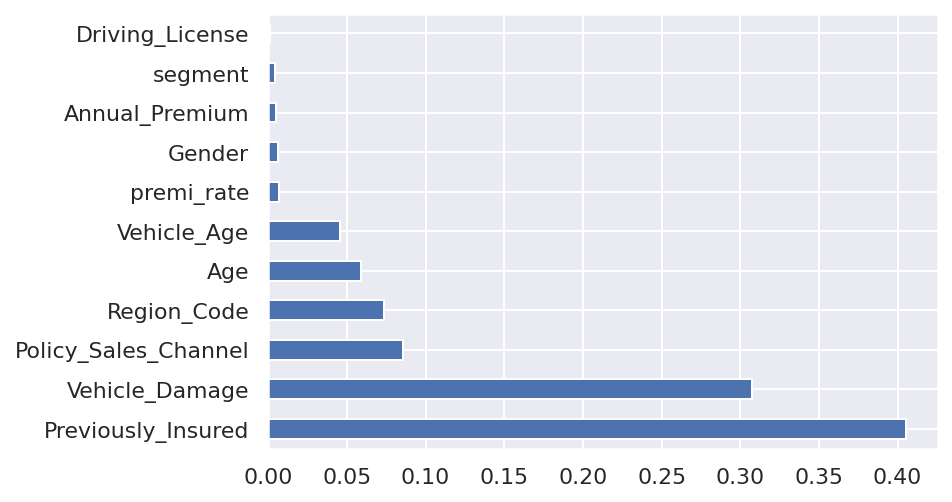

In [57]:
model = ExtraTreesClassifier()
model = model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas

#plot_graph_of_feature_importances for better_visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [ ]:
#x=x_frame.drop(['Driving_License'],axis=1,inplace=True)
#x=x_frame.copy()

In [58]:
x.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,segment,premi_rate
0,0,0,1,28,0,2,1,0,26,1,0
1,0,0,1,28,0,2,1,0,26,1,0
2,1,1,1,28,0,1,1,0,26,1,1
3,0,1,1,28,0,1,1,0,13,1,1
4,0,1,1,28,1,1,0,0,30,1,1


## Split Test & Train

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(455509, 11) (195219, 11) (455509, 1) (195219, 1)


# Modeling

In [60]:
#function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=42)
model1.fit(x_train, y_train) 

eval_classification(model1)

Accuracy (Test Set): 0.78
Accuracy (Train Set): 0.78
Precision (Test Set): 0.71
Precision (Train Set): 0.71
Recall (Test Set): 0.97
Recall (Train Set): 0.98
F1-Score (Test Set): 0.82
F1-Score (Train Set): 0.82
AUC (test-proba): 0.83
AUC (train-proba): 0.83


In [ ]:
logreg=LogisticRegression()

In [ ]:
logreg=LogisticRegression()
logreg=logreg.fit(x_train, y_train)

trlr = (str(logreg.score(x_train, y_train)))
tslr = (str(logreg.score(x_test, y_test)))

print('Train score: ' + trlr)
print('Test score: ' + tslr)

Train score: 0.7840547607182295
Test score: 0.7847289454407614


In [ ]:
pred=logreg.predict(x_test)
lr_probability =logreg.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.plot(fpr,tpr)
plt.plot(fpr, tpr, color='orange', label='Linear Regression ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
#plt.plot((0,1), ls='dashed',color='black')

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.legend()
plt.show()

## XGBOOST

In [ ]:
from xgboost import XGBClassifier, XGBRegressor
model2 = XGBClassifier(random_state=42)
model2.fit(x_train, y_train)

eval_classification(model2)

Accuracy (Test Set): 0.80
Accuracy (Train Set): 0.80
Precision (Test Set): 0.74
Precision (Train Set): 0.74
Recall (Test Set): 0.93
Recall (Train Set): 0.93
F1-Score (Test Set): 0.82
F1-Score (Train Set): 0.82
AUC (test-proba): 0.86
AUC (train-proba): 0.86


In [ ]:
xgbc = XGBClassifier(n_jobs = -1, n_estimators=150, learning_rate=0.01)
clf_x = xgbc.fit(x_train,y_train)

trxg = (str(xgbc.score(x_train, y_train)))
tsxg = (str(xgbc.score(x_test, y_test)))

print('Train score: ' + trxg)
print('Test score: ' + tsxg)

Train score: 0.794350934888224
Test score: 0.7940057064117735


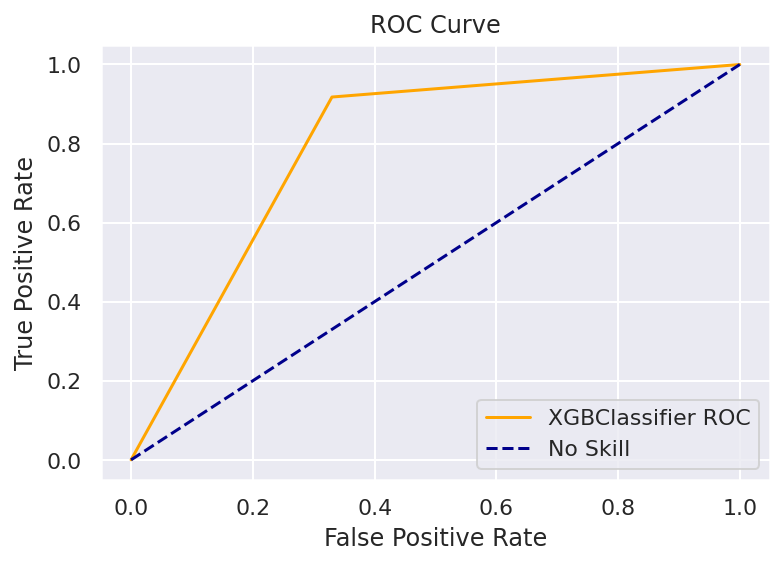

In [ ]:
y_pred_x = clf_x.predict(x_test)

fpr1,tpr1,threshold=roc_curve(y_test,y_pred_x)
plt.plot(fpr1, tpr1, color='orange', label='XGBClassifier ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=42)
model3.fit(x_train, y_train)

eval_classification(model3)

Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.83
Precision (Test Set): 0.76
Precision (Train Set): 0.76
Recall (Test Set): 0.94
Recall (Train Set): 0.95
F1-Score (Test Set): 0.84
F1-Score (Train Set): 0.85
AUC (test-proba): 0.87
AUC (train-proba): 0.89


In [62]:
randomforest = RandomForestClassifier()
randomforest=randomforest.fit(x_train, y_train)

trfc = (str(randomforest.score(x_train, y_train)))
tsfc = (str(randomforest.score(x_test, y_test)))

print('Train score: ' + trfc)
print('Test score: ' + tsfc)

Train score: 0.827390896777012
Test score: 0.8190186406036297


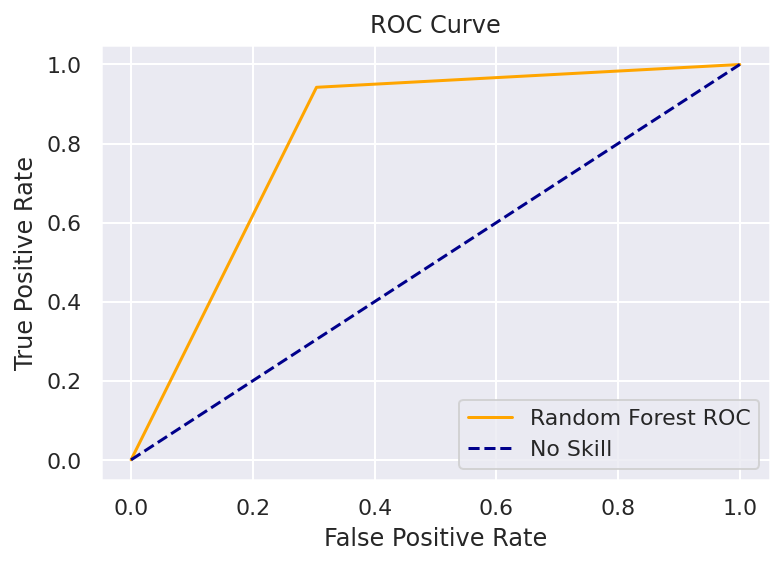

In [63]:
y_pred = randomforest.predict(x_test)

fpr2,tpr2,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr2, tpr2, color='orange', label='Random Forest ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#plt.figure(figsize=(8,5))
#sns.heatmap(confusion_matrix(y_test,y_pred),cmap = 'viridis',annot = True,linewidths = 2,linecolor = 'limegreen',fmt = '.2g')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#TP_rf = 92000
#FP_rf = 30000
#FN_rf = 5700
#TN_rf = 68000

#accuracy_rf = (TP_rf + TN_rf) / (TP_rf + FP_rf + FN_rf + TN_rf)
#precision_rf = TP_rf / (TP_rf + FP_rf)
#recall_rf = TP_rf / (TP_rf + FN_rf)
#print(accuracy_rf)
#print(precision_rf)
#print(recall_rf)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(random_state=42)
model4.fit(x_train, y_train)

eval_classification(model4)

Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.83
Precision (Test Set): 0.76
Precision (Train Set): 0.76
Recall (Test Set): 0.94
Recall (Train Set): 0.95
F1-Score (Test Set): 0.84
F1-Score (Train Set): 0.85
AUC (test-proba): 0.87
AUC (train-proba): 0.89


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

trdt = (str(dt.score(x_train, y_train)))
tsdt = (str(dt.score(x_test, y_test)))

print('Train score: ' + trdt)
print('Test score: ' + tsdt)

Train score: 0.8274018735085366
Test score: 0.8181273339172929


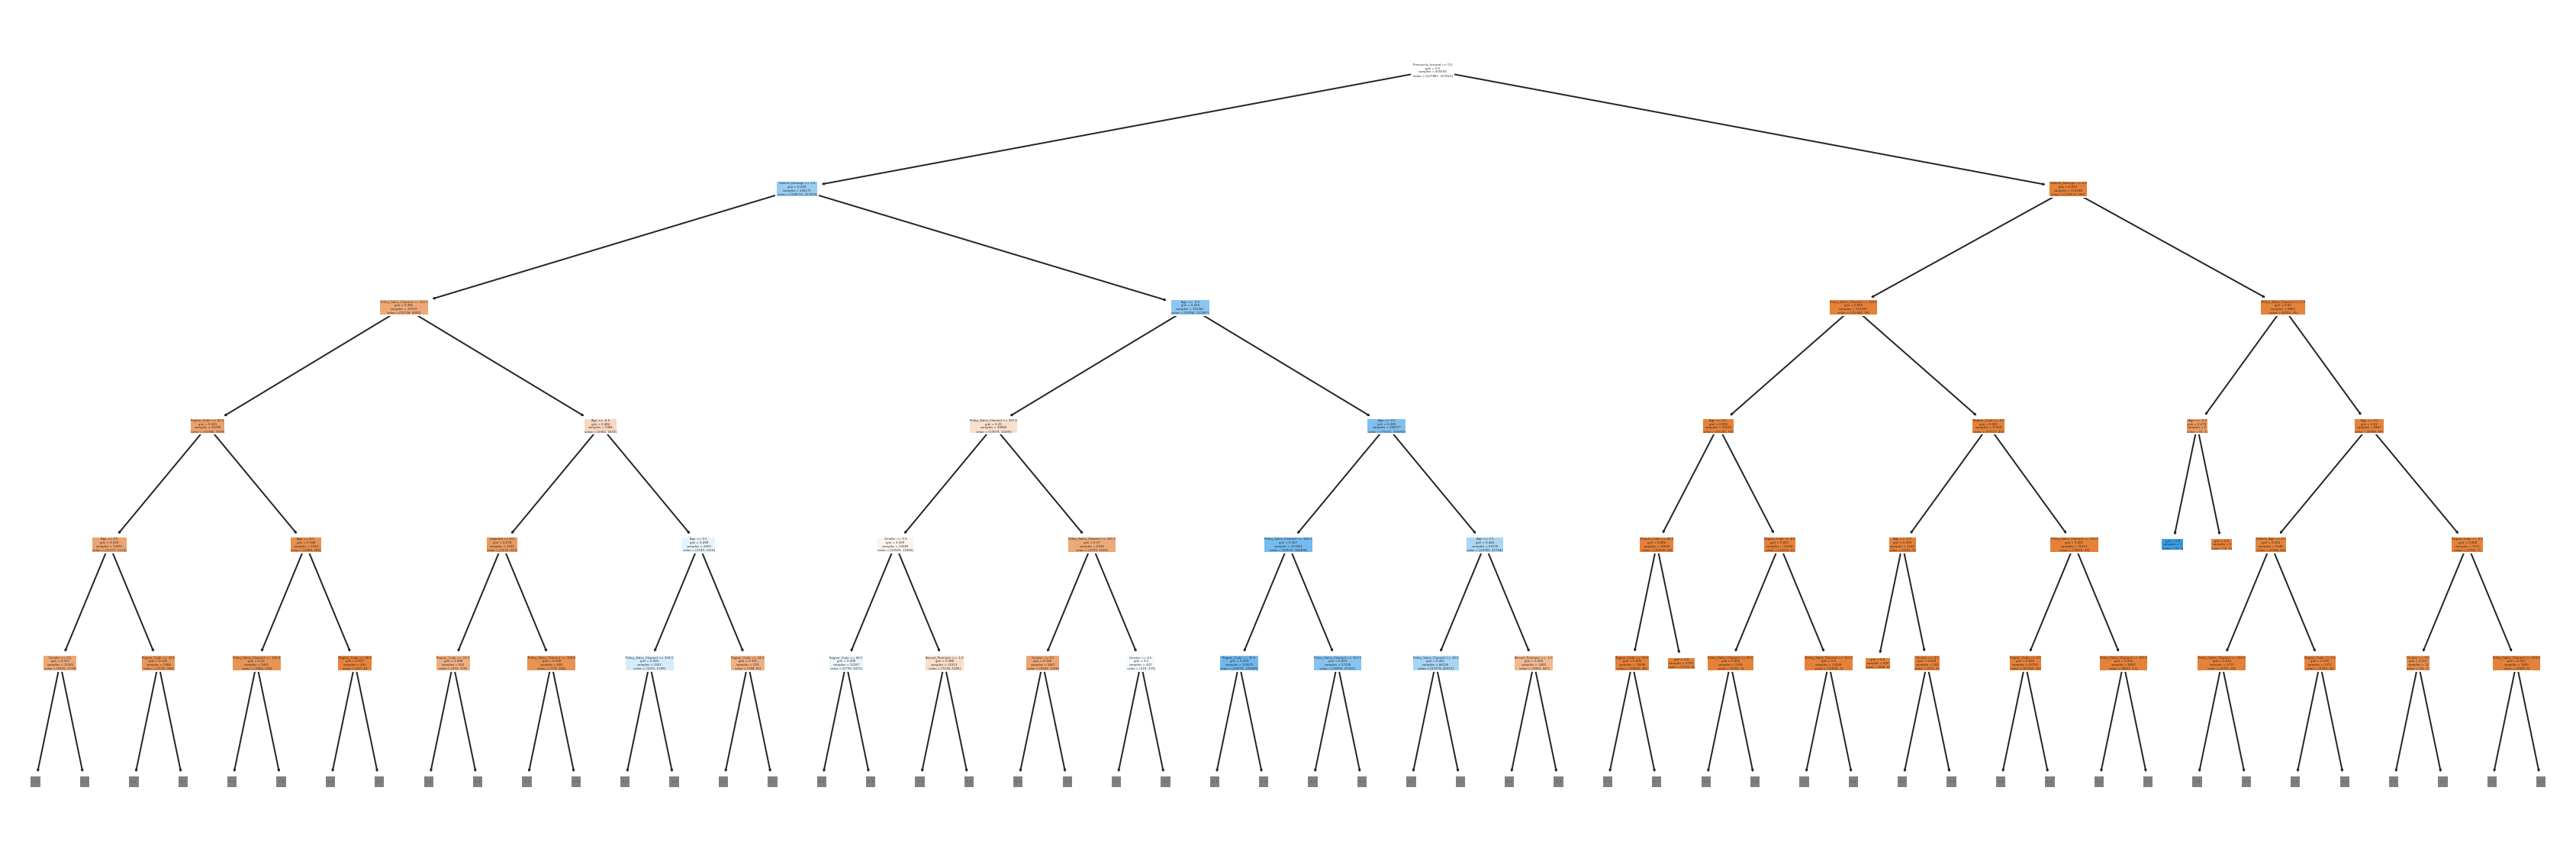

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(30,10))

plot_tree(dt, feature_names=x_train.columns, max_depth=5, filled=True);

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#f, ax = plt.subplots(figsize=(8,5))
#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.show()

#TP: 91995
#FP: 29602
#FN: 5747
#TN: 67875

## Model Evaluation Comparation (di PPT)

In [ ]:
#ind=['Logistic regression','Randomforest','XGBClassifier', 'DecisionTreeClassifier']
data={"Accuracy_train":[acc_lr,acc_rf,acc_xg,acc_dt],"Recall":[recall_lr,recall_rf,recall_xg,recall_dt],"Precision":[precision_lr,precision_rf,precision_xg,precision_dt],
    'f1_score':[f1score_lr,f1score_rf,f1score_xg,f1score_dt],"ROC_AUC":[AUC_LR,AUC_RF,AUC_XG,AUC_DT]}
result=pd.DataFrame(data=data,index=ind)
result

In [ ]:
ind=['Train','Test']
d = {'Logistic regression': [trlr,tslr], 'Randomforest': [trfc,tsfc], 'XGBClassifier': [trxg,tsxg], 'Decision Tree': [trdt,tsdt]}

modelcompare= pd.DataFrame(data=d, index=ind)
modelcompare

,Logistic regression,Randomforest,XGBClassifier,Decision Tree
Train,0.7840547607182295,0.827390896777012,0.794350934888224,0.8274018735085366
Test,0.7847289454407614,0.8190801100302737,0.7940057064117735,0.8181273339172929


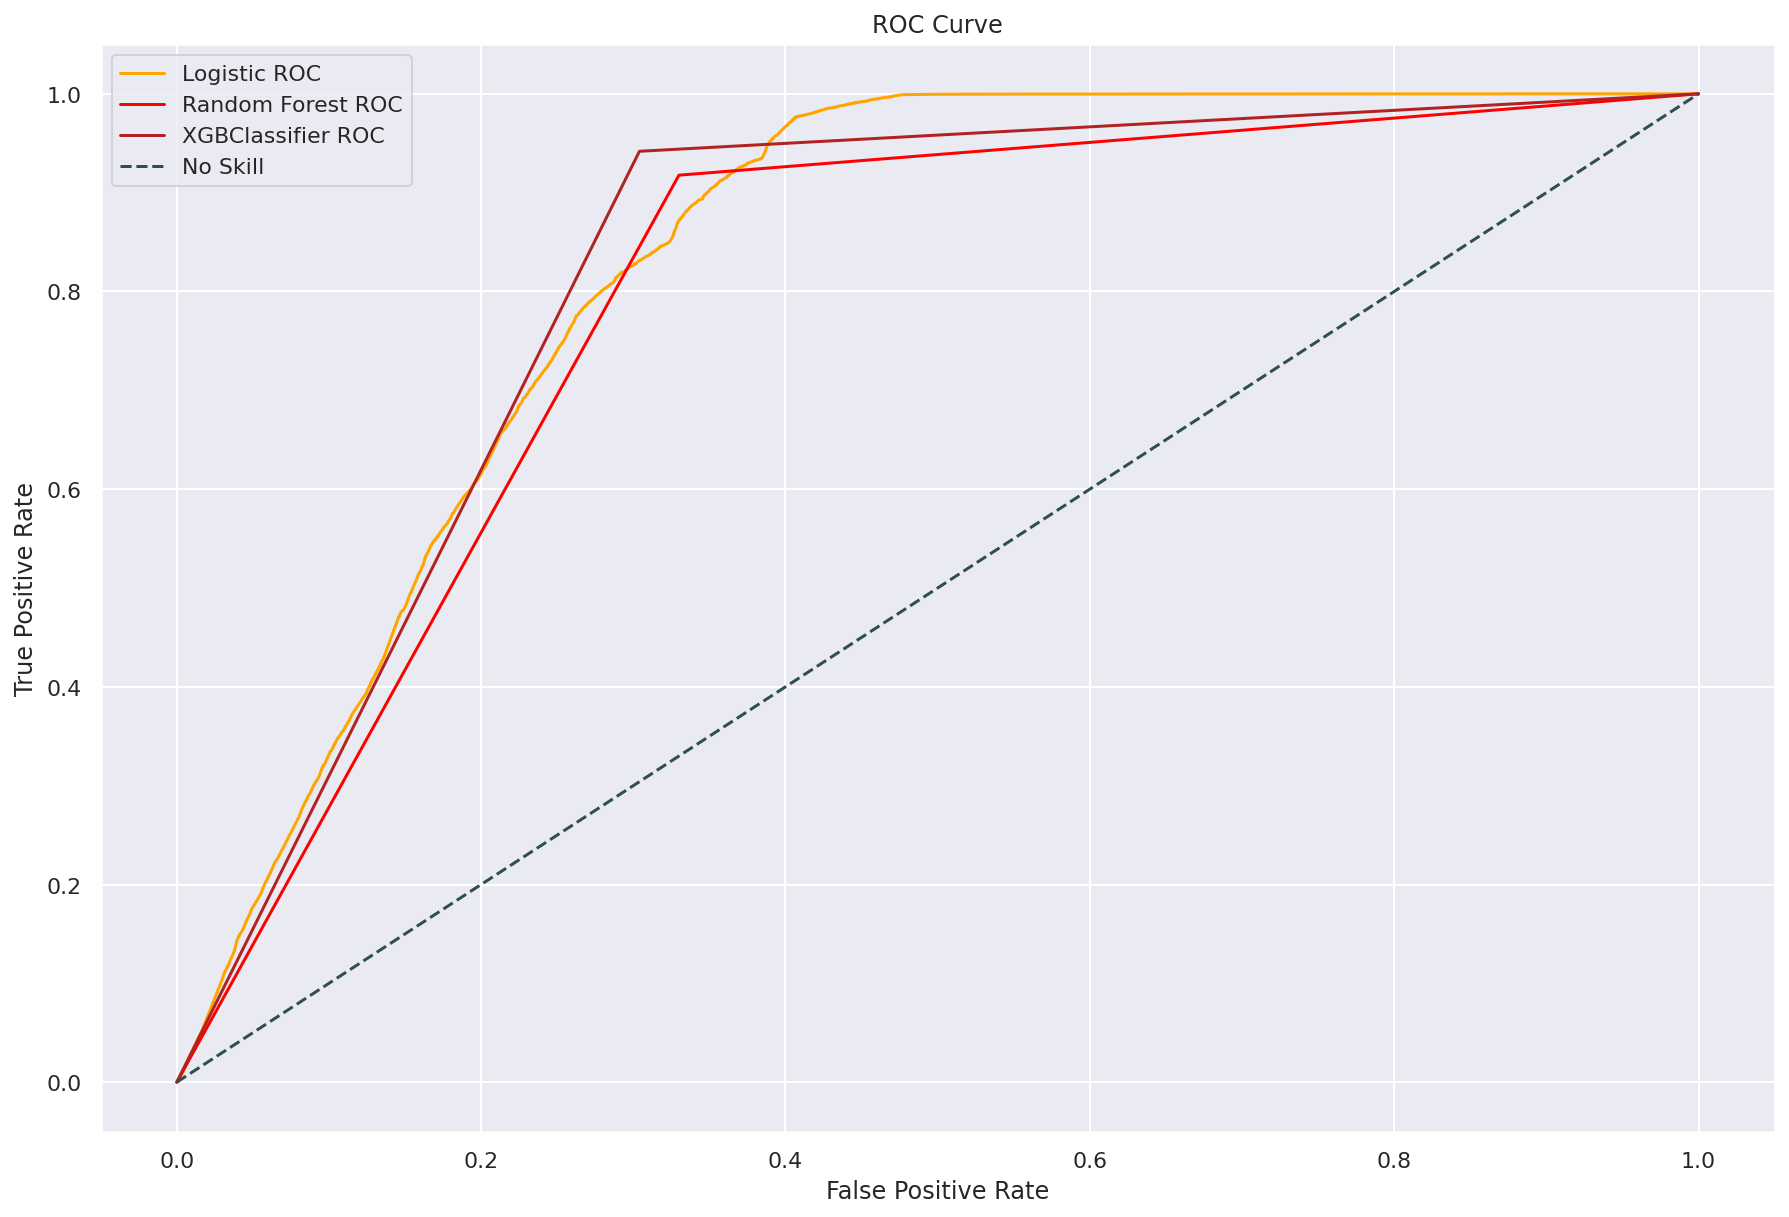

In [ ]:
#Plot to show all the Roc Curve with Different Models
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, color='orange', label='Logistic ROC')
plt.plot(fpr1, tpr1, color='red', label='Random Forest ROC')
plt.plot(fpr2, tpr2, color='firebrick', label='XGBClassifier ROC')
#plt.plot(fpr3, tpr3, color='indigo', label='DecisionTreeClassifier ROC')

plt.plot([0, 1], [0, 1], color='darkslategrey', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Hyperparameter Tuning

### Logistic Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
hyperparams = dict(penalty = ['l2']
                       ,class_weight = [None],C = [0.06],solver = ['saga']
                       ,tol = [0.004],max_iter = [1600],random_state = [42]
                       ,dual = [False],fit_intercept = [True]
                       ,intercept_scaling = [1],l1_ratio = [None]
                       ,multi_class = ['auto'],n_jobs = [None]
                       ,verbose = [0],warm_start = [False])

lr = LogisticRegression(random_state=42)
gs1 = GridSearchCV(lr, hyperparams, cv=5, scoring='roc_auc')
rs1 = RandomizedSearchCV(lr, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
gs1.fit(x_train,y_train)
rs1.fit(x_train,y_train)
eval_classification(gs1)

Accuracy (Test Set): 0.78
Accuracy (Train Set): 0.78
Precision (Test Set): 0.71
Precision (Train Set): 0.71
Recall (Test Set): 0.97
Recall (Train Set): 0.98
F1-Score (Test Set): 0.82
F1-Score (Train Set): 0.82
AUC (test-proba): 0.83
AUC (train-proba): 0.83


In [ ]:
gs1.best_estimator_.get_params()

{'C': 0.06,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1600,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'saga',
 'tol': 0.004,
 'verbose': 0,
 'warm_start': False}

In [ ]:
trfc1 = (str(gs1.score(x_train, y_train)))
tsfc1 = (str(gs1.score(x_test, y_test)))

print('Train score: ' + trfc1)
print('Test score: ' + tsfc1)

Train score: 0.8297374741044279
Test score: 0.8285952322172405


### XGBOOST

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

hyperparameters = {
                    'n_estimators': [800],
                    'max_depth' : [8],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 11)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'loss' : ['deviance', 'exponential'],
                    'max_leaf_nodes' : [3,4,7]
                    }

xg = XGBClassifier(random_state=42)
rs2 = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
gs2 = GridSearchCV(xg, hyperparameters, cv=5, scoring='roc_auc')
rs2.fit(x_train,y_train)

# Predict & Evaluation
eval_classification(rs2)

Accuracy (Test Set): 0.81
Accuracy (Train Set): 0.82
Precision (Test Set): 0.75
Precision (Train Set): 0.75
Recall (Test Set): 0.94
Recall (Train Set): 0.94
F1-Score (Test Set): 0.83
F1-Score (Train Set): 0.84
AUC (test-proba): 0.87
AUC (train-proba): 0.87


In [ ]:
rs2.best_estimator_.get_params()

{'alpha': 0.6000000000000001,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.8,
 'eta': 0.9,
 'gamma': 0.4,
 'lambda': 0.1,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_delta_step': 0,
 'max_depth': 8,
 'max_leaf_nodes': 7,
 'min_child_weight': 8,
 'missing': None,
 'n_estimators': 800,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'tree_method': 'approx',
 'verbosity': 1}

In [ ]:
print('Train score: ' + str(rs2.score(x_train, y_train)))
print('Test score:' + str(rs2.score(x_test, y_test)))

Train score: 0.8732813952233561
Test score:0.8687127602411229


### Random Forest

**ROC-AUC**

In [64]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [100], #[int(x) for x in np.linspace(start = 100, stop = 100, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [10,20,25,30,35],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [1,2,3,4,5,6,7,8,9,10], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

rf = RandomForestClassifier(random_state=42)
gs3 = GridSearchCV(rf, hyperparameters, cv=5, scoring='roc_auc')
rs3 = RandomizedSearchCV(rf, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
rs3.fit(x_train,y_train)

# Predict & Evaluation
eval_classification(rs3)

Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.82
Precision (Test Set): 0.76
Precision (Train Set): 0.76
Recall (Test Set): 0.94
Recall (Train Set): 0.94
F1-Score (Test Set): 0.84
F1-Score (Train Set): 0.84
AUC (test-proba): 0.87
AUC (train-proba): 0.88


In [65]:
rs3.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 35,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [66]:
trfc3 = (str(rs3.score(x_train, y_train)))
tsfc3 = (str(rs3.score(x_test, y_test)))

print('Train score: ' + trfc3)
print('Test score: ' + tsfc3)

Train score: 0.8824646271735292
Test score: 0.8726328278886866


**F1 score**

In [67]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [100], #[int(x) for x in np.linspace(start = 100, stop = 100, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [10,20,25,30,35],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [1,2,3,4,5,6,7,8,9,10], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

rf = RandomForestClassifier(random_state=42)
gs3b = GridSearchCV(rf, hyperparameters, cv=5, scoring='f1')
rs3b = RandomizedSearchCV(rf, hyperparameters, random_state=42, cv=5, scoring='f1')
rs3b.fit(x_train,y_train)

# Predict & Evaluation
eval_classification(rs3b)

Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.82
Precision (Test Set): 0.76
Precision (Train Set): 0.76
Recall (Test Set): 0.94
Recall (Train Set): 0.94
F1-Score (Test Set): 0.84
F1-Score (Train Set): 0.84
AUC (test-proba): 0.87
AUC (train-proba): 0.88


In [68]:
rs3b.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 35,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [69]:
trfc3 = (str(rs3b.score(x_train, y_train)))
tsfc3 = (str(rs3b.score(x_test, y_test)))

print('Train score: ' + trfc3)
print('Test score: ' + tsfc3)

Train score: 0.8429752066115703
Test score: 0.8379233617246348


#### Confusion matrix random forest

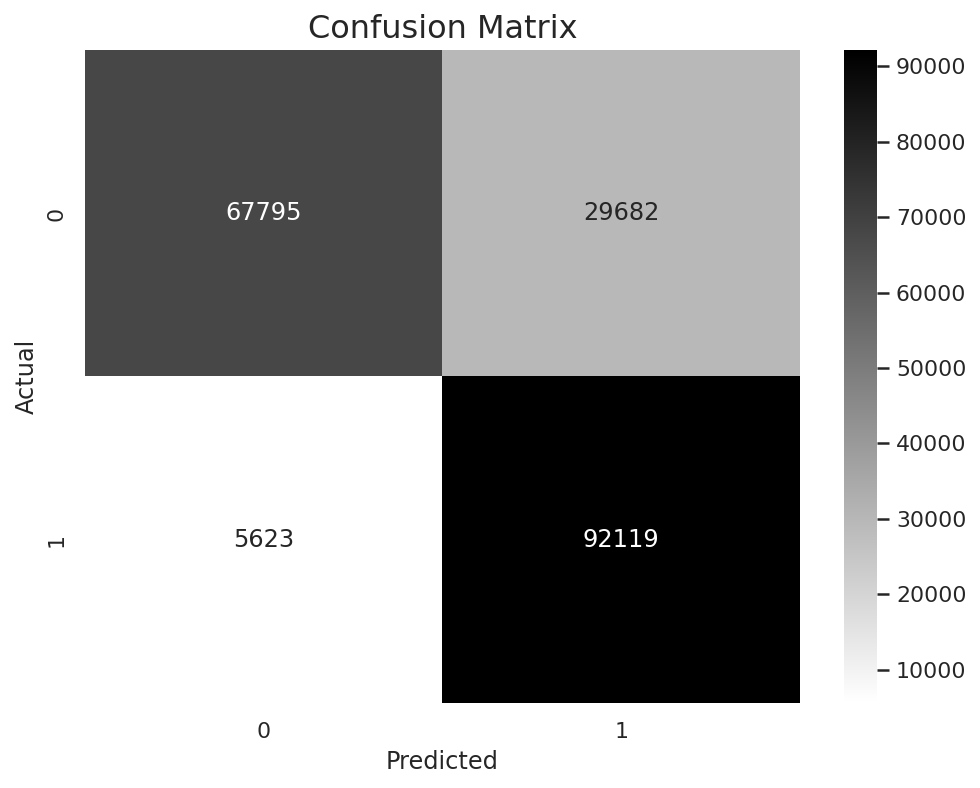

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(random_state=42)

rf.fit(x_train, y_train)
preds = rf.predict(x_test)

cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt=".0f", cmap='gist_yarg');
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#TP: 92119
#FP: 29682
#FN: 5623
#TN: 67795

### Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

hyperparameters = dict(max_depth = [2000] # Maximum number of levels in tree
                       ,min_samples_split = [7] # Minimum number of samples required to split a node
                       ,min_samples_leaf = [1] # Minimum number of samples required at each leaf node
                       ,max_features = ['log2'] # Number of features to consider at every split
                       ,criterion = ['gini']
                       ,max_leaf_nodes = [3])


dt = DecisionTreeClassifier(random_state=42)
rs4 = RandomizedSearchCV(dt, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
gs4 = GridSearchCV(dt, hyperparameters, cv=5, scoring='roc_auc')
gs4.fit(x_train, y_train)
eval_classification(gs4)

Accuracy (Test Set): 0.79
Accuracy (Train Set): 0.78
Precision (Test Set): 0.71
Precision (Train Set): 0.71
Recall (Test Set): 0.98
Recall (Train Set): 0.98
F1-Score (Test Set): 0.82
F1-Score (Train Set): 0.82
AUC (test-proba): 0.79
AUC (train-proba): 0.78


In [ ]:
 gs4.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2000,
 'max_features': 'log2',
 'max_leaf_nodes': 3,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
print('Train score: ' + str(gs4.score(x_train, y_train))) 
print('Test score:' + str(gs4.score(x_test, y_test))) 

Train score: 0.7848875925384902
Test score:0.7851218795587223


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

hyperparameters = dict(max_depth = [2000] # Maximum number of levels in tree
                       ,min_samples_split = [7] # Minimum number of samples required to split a node
                       ,min_samples_leaf = [1] # Minimum number of samples required at each leaf node
                       ,max_features = ['log2'] # Number of features to consider at every split
                       ,criterion = ['gini']
                       ,max_leaf_nodes = [3])


dt = DecisionTreeClassifier(random_state=42)
rs4b = RandomizedSearchCV(dt, hyperparameters, random_state=42, cv=5, scoring='f1')
gs4b = GridSearchCV(dt, hyperparameters, cv=5, scoring='f1')
gs4b.fit(x_train, y_train)
eval_classification(gs4b)

Accuracy (Test Set): 0.79
Accuracy (Train Set): 0.78
Precision (Test Set): 0.71
Precision (Train Set): 0.71
Recall (Test Set): 0.98
Recall (Train Set): 0.98
F1-Score (Test Set): 0.82
F1-Score (Train Set): 0.82
AUC (test-proba): 0.79
AUC (train-proba): 0.78


In [ ]:
 gs4b.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2000,
 'max_features': 'log2',
 'max_leaf_nodes': 3,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
print('Train score: ' + str(gs4b.score(x_train, y_train))) 
print('Test score:' + str(gs4b.score(x_test, y_test))) 

Train score: 0.8192744018870043
Test score:0.8199120516696441


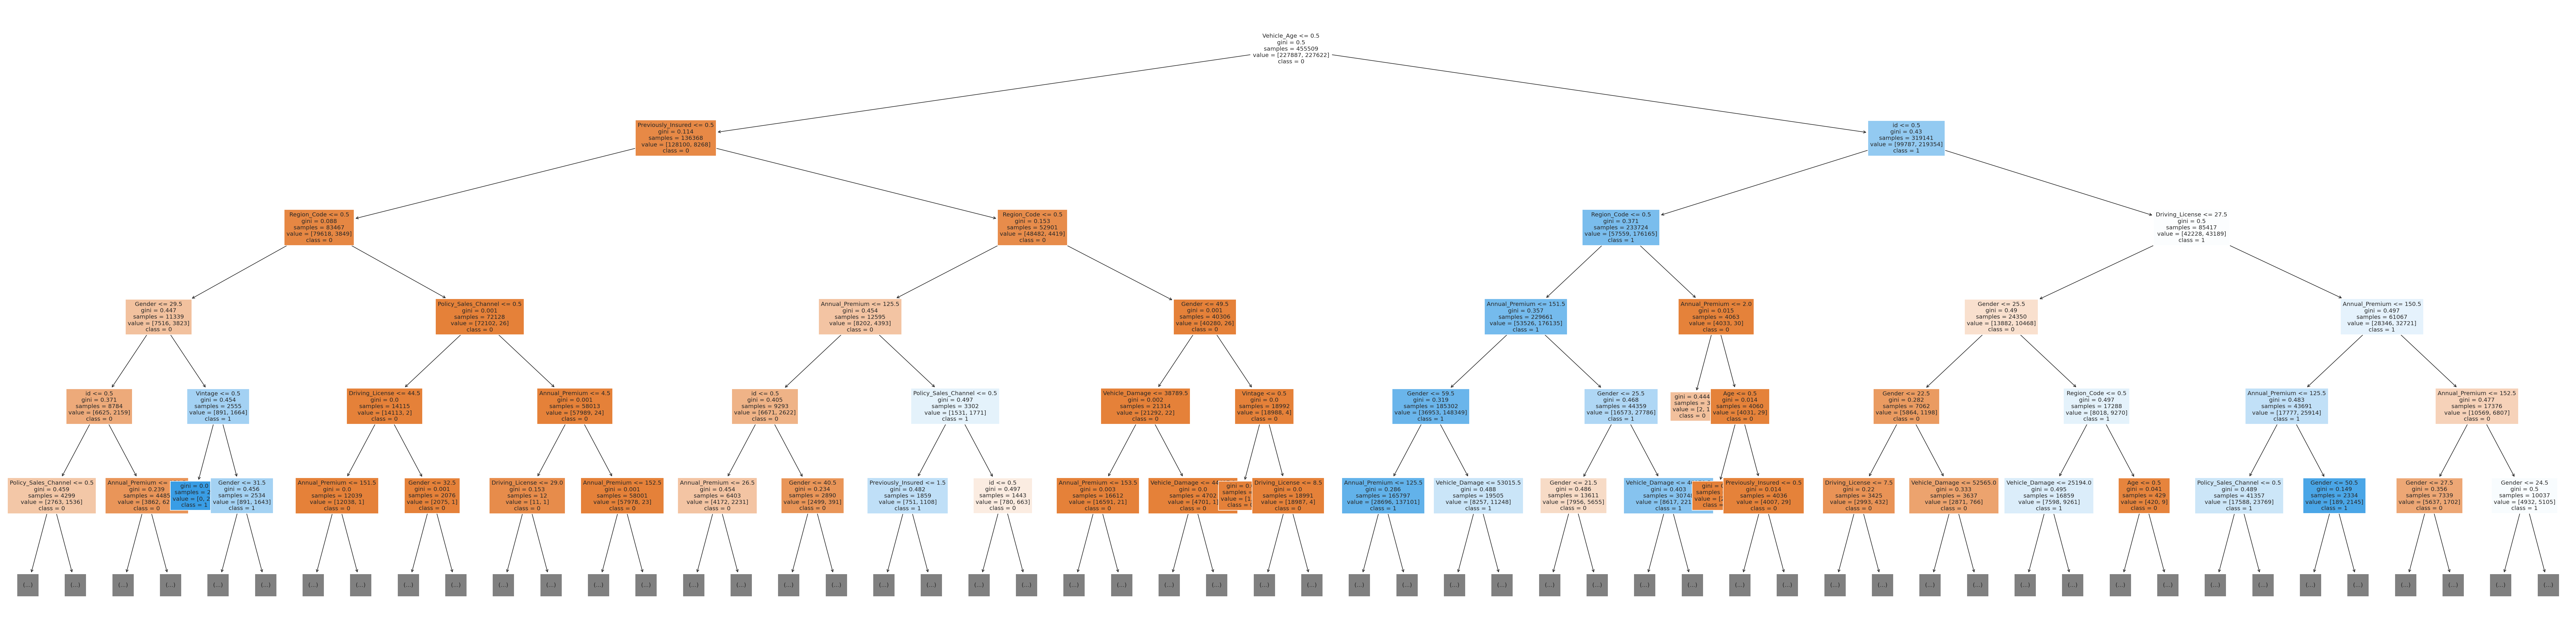

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(80, 20))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

## Feature Importance

### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

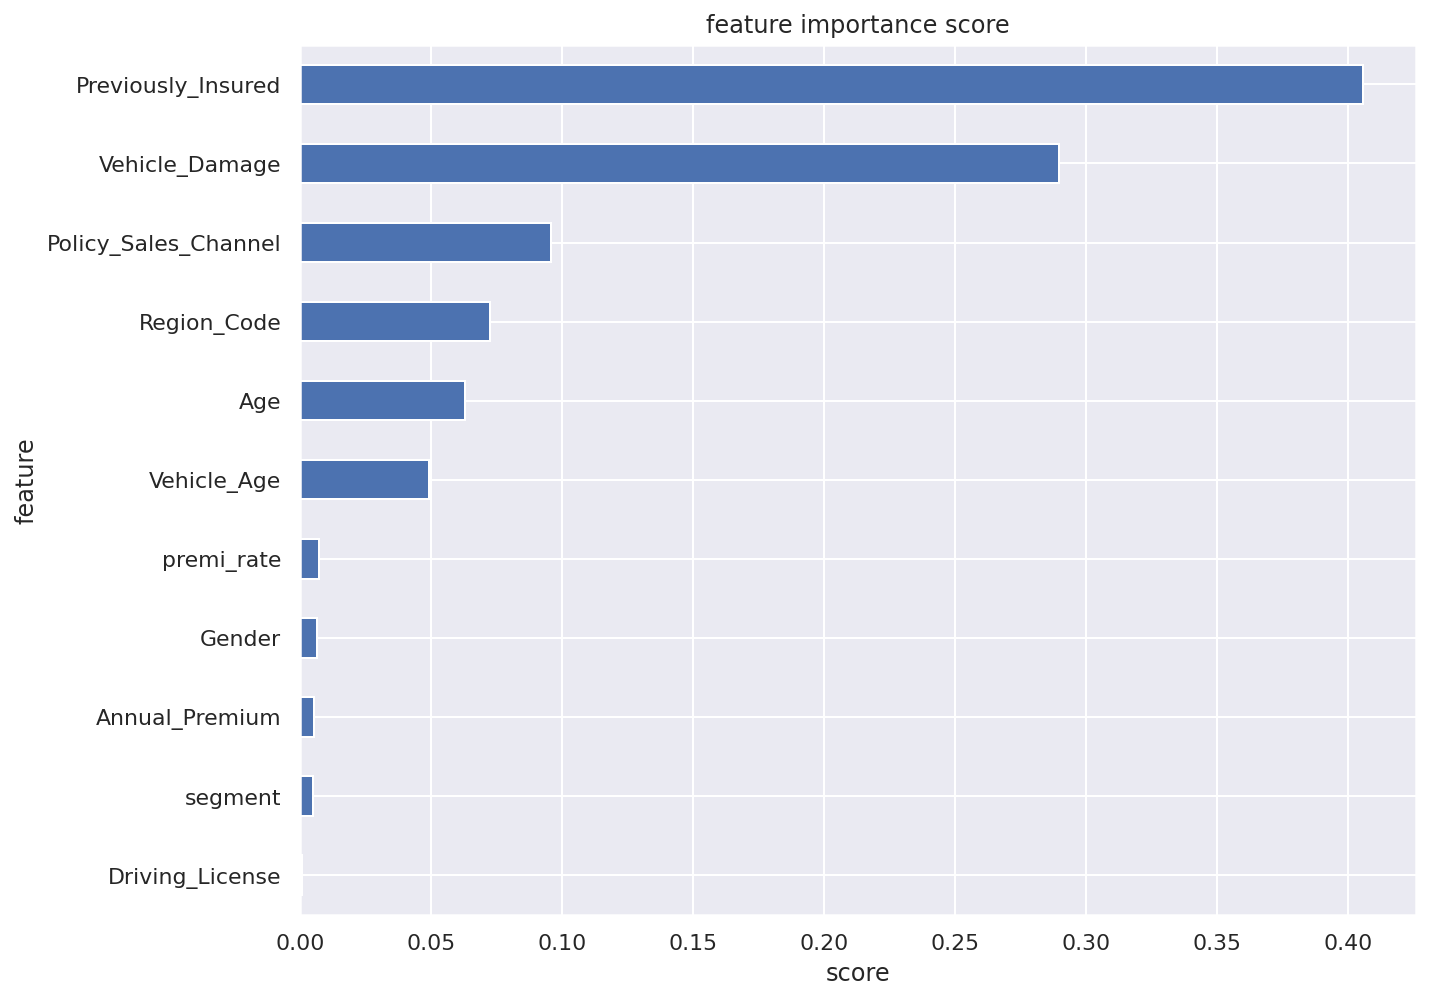

In [71]:
show_feature_importance(rs3b.best_estimator_)

In [23]:
#x_test.reset_index(level=0, inplace=True)

#y_pred_df = pd.DataFrame(y_pred)
#y_pred_df = pd.DataFrame(y_pred)

#combine_df = x_test.merge(y_pred_df, on='index')

### INSIGHT

Dari hasil feature importance pada model Random Forest didapatkan top 5 feature yaitu:


1.   Previously Insured
2.   Vehicle Damage   
3.   Policy Sales Channel
4.   Region Code
5.   Age

Diluar top 5 feature terdapat feature yang penting secara teori untuk model yaitu feature Vehicle Age

**Business insight yang dapat diambil dari feature-feature diatas adalah:**

**1. Previously Insured** <br>
Riwayat customer apakah pernah memiliki asuransi kendaraan sebelumnya menjadi poin yang penting dalam pemodelan ini. Dari hasil EDA, didapatkan bahwa mayoritas customer yang tertarik adalah customer yang sebelumnya belum pernah memiliki asuransi kendaraan. Kita dapat memanfaatkan data customer yang sebelumnya pernah memiliki asuransi namun merespon tidak tertarik untuk menggali informasi lebih dalam. Dapat dilakukan survey yang dikirim melalui email atau melalui telepon untuk mendapatkan informasi terkait alasan/faktor yang mendasari customer tidak tertarik saat ditawarkan asuransi kendaraan bermotor lagi. Kemudian dari informasi tersebut dapat kita gunakan untuk mengembangkan produk kita agar lebih sesuai dengan kebutuhan customer.

**2. Vehicle Damage** <br>
Berdasarkan hasil EDA, mayoritas customer yang tertarik merupakan customer yang sudah pernah mengalami kerusakaan pada kendaraanya. Hal ini bisa disebabkan karena customer dengan kendaraan yang sudah mengalami kerusakan lebih aware dibandingkan yang belum mengalami kerusakan, sehingga ketertarikannya lebih tinggi. Hal ini bisa dioptimalkan dengan memberikan informasi mengenai pentingnya mengasuransikan kendaraan ataupun meningkatkan promosi, sehingga user yang tidak tertarik bisa lebih yakin dan mau mendaftar asuransi kendaraan.

**3. Policy Sales Channel** <br>
Promosi merupakan faktor yang penting dalam proses pemasaran. Policy sales channel merupakan code-code dari media pendekatan terhadap customer. Kita dapat melihat mayoritas customer yang tertarik itu di dilakukan pendekatan melalui media apa, dan juga kita dapat melihat karakteristik dari setiap customer pada setiap media pendekatan agar dalam proses promosi selanjutnya bisa lebih efektif dan tepat sasaran.

**3. Region Code** <br>
Wilayah pembelian asuransi kendaraan menjadi salah satu faktor yang penting, karena akan mempengaruhi besaran preminya. Untuk wilayah yang tidak padat lalu lintasnya maka nilai premi asuransi kendarannya akan lebih rendah. Kita dapat meningkatkan promosi pada lokasi yang lalu lintasnya tidak terlalu padat sehingga kemungkinan ketertarikan customer akan lebih tinggi karena premi yang ditawarkan tidak terlalu tinggi. <br>

**5. Age** <br>
Dalam penetapan premi usia menjadi salah satu pertimbangan bagi aktuaria, banyak asuransi yang menetapkan premi lebih tinggi untuk customer pada usia 20-30 tahun dikarenakan customer yang usianya 20-30 tahun dinilai lebih ceroboh dan kurang berhati-hati. Berdasarkan hasil EDA, customer yang merespon tertarik mayoritas berusia 40-50 tahun. Kita dapat mengembangkan produk asuransi bagi customer yang berusia 20-30 tahun dengan premi yang lebih rendah atau mendekati premi customer yang berusia 40-50 tahun. Namun dalam pengembangan produknya memerlukan data terkait perilaku berkendara customer pada rentang usia tersebut, agar perusahaan tetap mendapatkan profit yang optimal.

Selain itu terdapat feature yang secara teori dapat dipertimbangkan untuk masuk ke dalam model yaitu : <br>
**1. Vehicle Age** <br>
Umur kendaraan merupakan salah satu hal yang penting, karena untuk kendaraan yang usianya lebih dari 2 tahun preminya akan lebih tinggi karena ada biaya tambahan lainnya (loading fee). Penambahan biaya tersebut dikarenakan faktor kesulitan merawat mobil yang sudah berumur, seperti sparepart yang sudah langka dan lain-lain. Hasil EDA pun menunjukkan bahwa mayoritas customer yang tertarik merupakan customer dengan usia kendaraan 1-2 tahun. Untuk meningkatkan customer yang tertarik kita dapat bekerja sama dengan dealer mobil dengan menawarkan premi yang rendah untuk mobil-mobil baru atau juga bekerja sama dengan bank leasing ketika ada penjualan mobil baru yang dicicil melalui bank tersebut akan mendapatkan potongan harga untuk asuransi kendaraannya.

## Feature Selection

### A. Random Forest

In [ ]:
x_train_rf = x_train[['Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Region_Code', 'Age']]
x_train_rf.head()

In [ ]:
x_test_rf = x_test[['Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Region_Code', 'Age']]
x_test_rf.head()

In [ ]:
scaler = StandardScaler().fit(x_train_rf)
x_train_s = scaler.transform(x_train_rf)
x_test_s = scaler.transform(x_test_rf)

In [ ]:
randomforest = RandomForestClassifier()
randomforest=randomforest.fit(x_train_rf, y_train)
y_pred = randomforest.predict(x_test_rf)
RF_probability = randomforest.predict_proba(x_test_rf)[:,1]

AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)

print("Accuracy Score :",accuracy_score(y_pred,y_test))
print("ROC_AUC Score :",AUC_RF)

In [ ]:
trfc = (str(randomforest.score(x_train_rf, y_train)))
tsfc = (str(randomforest.score(x_test_rf, y_test)))

print('Train score: ' + trfc)
print('Test score: ' + tsfc)

In [ ]:
print(classification_report(y_test,y_pred))